# Deloitte - NYC Department of Health and Mental Hygiene
## Author - LZ
## Modify date - 04/30/2022

In [1]:
#import packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
import shap

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


## There are a couple of ways we can approach the risk scores from here on. 

- Approach 1: Since we don't actually have the classes for whether a restaurant is high, medium, or low risk, we can make it up. We can say based on just the average or the median inspection score of the restaurant, we determine the classes of the restaurants and see how well the parameters we have created predict the various classes of the restaurants. This way, we can apply supervised ML methods towards our dataset. 
    - here are a few articles for reference
    - Classifying breast Cancer: https://towardsdatascience.com/a-step-by-step-guide-to-building-a-multiclass-classifier-for-breast-tissue-classification-5b685d765e97 
    - Various classification methods in python explained: https://www.activestate.com/resources/quick-reads/how-to-classify-data-in-python/
    - Comprehensive article on how to operationalize the various Supervised ML methods: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a
    - XGBoosting: https://www.datacamp.com/community/tutorials/xgboost-in-python#what
    - Article with a picture on the various models we can apply: https://towardsdatascience.com/machine-learning-with-python-classification-complete-tutorial-d2c99dc524ec
    

- Approach 2: Since we don't have the classes, we can use unsupervised learning methods like clustering to create the clusters for high, medium, and low risks. and then evaluate each cluster. 
    - Unsupervised ML evaluation exaplined: https://www.guavus.com/technical-blog/unsupervised-machine-learning-validation-techniques/
    - Basic article on how to evluate clusters: https://medium.datadriveninvestor.com/top-5-machine-learning-algorithms-used-by-data-scientists-with-python-part-1-51bae4e1b21e
    - K-Prototypes CLustering with Python example: https://antonsruberts.github.io/kproto-audience/
    - Basic K-prototype Clustering in Python: https://medium.com/analytics-vidhya/clustering-on-mixed-data-types-in-python-7c22b3898086
    
   - sillouette evaluation: https://bpostance.github.io/posts/clustering-mixed-data/#3-method

In [2]:
#read data in
MASTER= pd.read_csv('Master_Dataset_Unique_New.csv')
MASTER.head()

id     CAMIS                name  is_closed  \
0  AgAkUVLN_axMY-bzbNCfCw  40983698            Yuca Bar      False   
1  rDqIGNlSpQXv5W1mpKnJeg  50096379    El Gallo Negro 2      False   
2  QGNhNw5lbzTtH8bkNl41BQ  41264387  Cuenca Coffee Shop      False   
3  mnEMipzEekqLWIogjAB_zA  41650474              Subway      False   
4  mnEMipzEekqLWIogjAB_zA  41650474              Subway      False   

   review_count  rating            transactions  Price  \
0          1902     4.0  ['delivery', 'pickup']      2   
1            43     3.5  ['delivery', 'pickup']      0   
2             5     4.0            ['delivery']      0   
3             9     2.5  ['pickup', 'delivery']      1   
4             9     2.5  ['delivery', 'pickup']      1   

                             DBA       BORO  ...  LATEST INSPECTION YEAR  \
0          YUCA BAR & RESTAURANT  Manhattan  ...                    2021   
1               EL GALLO NEGRO 2     Queens  ...                    2020   
2  CUENCA COFFEE SHOP RESTAURANT     Queens  ...                    2020   
3                         SUBWAY   Brooklyn  ...                    2021   
4                         SUBWAY   Brooklyn  ...                    2021   

                                           text_join rating_min  rating_max  \
0  my coworker & i were trying to find a good spo...          2           5   
1  the salad bar is everything!!!   this place is...          2           5   
2  what a great little find! good for a large gro...          1           5   
3  truly a staple of the queens community, friend...          3           5   
4  truly a staple of the queens community, friend...          3           5   

   rating_mean  Reviews_Flag  Reviews_Flag_Count  Revenue_Insp_Year  \
0     4.000000          True                   2              89343   
1     3.666667          True                   2              87211   
2     2.666667          True                   1              87211   
3     4.000000         False                   0              89343   
4     4.000000         False                   0              89343   

    Paid_Wages  Cuisine Category  
0  10446901184    South American  
1  10318151036    South American  
2  10318151036    South American  
3  10446901184         Universal  
4  10446901184         Universal  

[5 rows x 36 columns]

In [3]:
MASTER.describe()

CAMIS  review_count       rating        Price       ZIPCODE  \
count  7.031000e+03   7031.000000  7031.000000  7031.000000   7031.000000   
mean   4.647031e+07    258.208932     3.772863     1.438487  10555.411748   
std    4.388784e+06    530.418062     0.648531     0.904324   1241.717542   
min    3.007544e+07      1.000000     1.000000     0.000000      0.000000   
25%    4.141027e+07     30.000000     3.500000     1.000000  10018.000000   
50%    5.003560e+07    101.000000     4.000000     2.000000  10467.000000   
75%    5.008424e+07    276.000000     4.000000     2.000000  11225.000000   
max    5.011743e+07  13395.000000     5.000000     4.000000  11697.000000   

          Latitude    Longitude  MEDIAN INCOME  TOTAL POPULATION    INSP FREQ  \
count  7025.000000  7025.000000    6876.000000      7.031000e+03  7031.000000   
mean     40.296457   -73.170271   85696.892379      1.964381e+07     1.145356   
std       4.158538     7.550517   35752.882716      5.087334e+06     0.372307   
min       0.000000   -74.248372   21447.000000      4.710350e+06     1.000000   
25%      40.688681   -73.990322   56911.000000      1.617485e+07     1.000000   
50%      40.729240   -73.964868   79883.000000      1.617485e+07     1.000000   
75%      40.759232   -73.912517  118161.000000      2.560418e+07     1.000000   
max      40.910473     0.000000  250001.000000      2.560418e+07     5.000000   

       ...  BINNED_Avg.CritFine  TOTAL CRITICAL FINE  Avg.CritFine  \
count  ...          7031.000000          7031.000000   7031.000000   
mean   ...             1.082776           937.092874    795.948182   
std    ...             0.292102           814.669136    613.804609   
min    ...             1.000000             0.000000      0.000000   
25%    ...             1.000000           350.000000    350.000000   
50%    ...             1.000000           650.000000    600.000000   
75%    ...             1.000000          1250.000000   1050.000000   
max    ...             4.000000          6800.000000   6800.000000   

       LATEST INSPECTION YEAR   rating_min   rating_max  rating_mean  \
count             7031.000000  7031.000000  7031.000000  7031.000000   
mean              2020.427820     2.883231     4.770161     3.909212   
std                  0.494798     1.436030     0.581187     0.866695   
min               2020.000000     1.000000     1.000000     1.000000   
25%               2020.000000     1.000000     5.000000     3.333333   
50%               2020.000000     3.000000     5.000000     4.000000   
75%               2021.000000     4.000000     5.000000     4.666667   
max               2021.000000     5.000000     5.000000     5.000000   

       Reviews_Flag_Count  Revenue_Insp_Year    Paid_Wages  
count         7031.000000        7031.000000  7.031000e+03  
mean             0.679562       88123.111506  1.037323e+10  
std              0.873431        1054.908814  6.370528e+07  
min              0.000000       87211.000000  1.031815e+10  
25%              0.000000       87211.000000  1.031815e+10  
50%              0.000000       87211.000000  1.031815e+10  
75%              1.000000       89343.000000  1.044690e+10  
max              6.000000       89343.000000  1.044690e+10  

[8 rows x 24 columns]

In [4]:
MASTER.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7031 entries, 0 to 7030
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7031 non-null   object 
 1   CAMIS                   7031 non-null   int64  
 2   name                    7031 non-null   object 
 3   is_closed               7031 non-null   bool   
 4   review_count            7031 non-null   int64  
 5   rating                  7031 non-null   float64
 6   transactions            7031 non-null   object 
 7   Price                   7031 non-null   int64  
 8   DBA                     7031 non-null   object 
 9   BORO                    7031 non-null   object 
 10  ZIPCODE                 7031 non-null   int64  
 11  PHONE                   7031 non-null   object 
 12  CUISINE DESCRIPTION     7031 non-null   object 
 13  Latitude                7025 non-null   float64
 14  Longitude               7025 non-null   

In [5]:
MASTER = MASTER.drop(columns=['id', 'name', 'transactions', 'DBA', 'PHONE', 'ZIPCODE', 'CUISINE DESCRIPTION', 
                     'Latitude','Longitude', 'MEDIAN SCORE','AVG. SCORE', 'TOTAL CRITICAL FINE','Avg.CritFine',
                    'LATEST INSPECTION DATE', 'LATEST INSPECTION YEAR','text_join','rating_min', 'rating_max',
                    'Reviews_Flag', 'Revenue_Insp_Year','Paid_Wages', 'is_closed', 'Cuisine Category'])

In [6]:
encoded_data = pd.get_dummies(MASTER, columns = ['BORO'])
encoded_data

CAMIS  review_count  rating  Price  MEDIAN INCOME  TOTAL POPULATION  \
0     40983698          1902     4.0      2        63717.0          16174853   
1     50096379            43     3.5      0        61859.0          22721487   
2     41264387             5     4.0      0        73107.0          22721487   
3     41650474             9     2.5      1       119375.0          25604184   
4     41650474             9     2.5      1       119375.0          25604184   
...        ...           ...     ...    ...            ...               ...   
7026  50092264            59     4.0      2        66795.0          22721487   
7027  50018562           147     3.5      2        58305.0          14131491   
7028  50115210           227     4.0      1        61200.0          25604184   
7029  41504651            25     3.0      1        56911.0          25604184   
7030  50062884            92     4.0      2        58872.0          25604184   

      INSP FREQ  Crit FREQ  LATEST SCORE  BINNED_Avg.CritFine  rating_mean  \
0           2.0        5.0             7                    1     4.000000   
1           1.0        1.0            11                    1     3.666667   
2           1.0        1.0            12                    1     2.666667   
3           1.5        1.5            10                    1     4.000000   
4           1.5        1.5            10                    1     4.000000   
...         ...        ...           ...                  ...          ...   
7026        1.0        NaN             4                    1     3.666667   
7027        1.0        1.0            13                    1     5.000000   
7028        1.0        1.0            10                    1     4.666667   
7029        1.0        1.0            11                    1     4.000000   
7030        1.0        2.0            14                    1     4.666667   

      Reviews_Flag_Count  BORO_Bronx  BORO_Brooklyn  BORO_Manhattan  \
0                      2           0              0               1   
1                      2           0              0               0   
2                      1           0              0               0   
3                      0           0              1               0   
4                      0           0              1               0   
...                  ...         ...            ...             ...   
7026                   0           0              0               0   
7027                   0           1              0               0   
7028                   1           0              1               0   
7029                   0           0              1               0   
7030                   2           0              1               0   

      BORO_Queens  BORO_Staten Island  
0               0                   0  
1               1                   0  
2               1                   0  
3               0                   0  
4               0                   0  
...           ...                 ...  
7026            1                   0  
7027            0                   0  
7028            0                   0  
7029            0                   0  
7030            0                   0  

[7031 rows x 17 columns]

In [7]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7031 entries, 0 to 7030
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CAMIS                7031 non-null   int64  
 1   review_count         7031 non-null   int64  
 2   rating               7031 non-null   float64
 3   Price                7031 non-null   int64  
 4   MEDIAN INCOME        6876 non-null   float64
 5   TOTAL POPULATION     7031 non-null   int64  
 6   INSP FREQ            7031 non-null   float64
 7   Crit FREQ            6500 non-null   float64
 8   LATEST SCORE         7031 non-null   int64  
 9   BINNED_Avg.CritFine  7031 non-null   int64  
 10  rating_mean          7031 non-null   float64
 11  Reviews_Flag_Count   7031 non-null   int64  
 12  BORO_Bronx           7031 non-null   uint8  
 13  BORO_Brooklyn        7031 non-null   uint8  
 14  BORO_Manhattan       7031 non-null   uint8  
 15  BORO_Queens          7031 non-null   u

In [8]:
df  = encoded_data.iloc[: , -17:]

In [9]:
df

CAMIS  review_count  rating  Price  MEDIAN INCOME  TOTAL POPULATION  \
0     40983698          1902     4.0      2        63717.0          16174853   
1     50096379            43     3.5      0        61859.0          22721487   
2     41264387             5     4.0      0        73107.0          22721487   
3     41650474             9     2.5      1       119375.0          25604184   
4     41650474             9     2.5      1       119375.0          25604184   
...        ...           ...     ...    ...            ...               ...   
7026  50092264            59     4.0      2        66795.0          22721487   
7027  50018562           147     3.5      2        58305.0          14131491   
7028  50115210           227     4.0      1        61200.0          25604184   
7029  41504651            25     3.0      1        56911.0          25604184   
7030  50062884            92     4.0      2        58872.0          25604184   

      INSP FREQ  Crit FREQ  LATEST SCORE  BINNED_Avg.CritFine  rating_mean  \
0           2.0        5.0             7                    1     4.000000   
1           1.0        1.0            11                    1     3.666667   
2           1.0        1.0            12                    1     2.666667   
3           1.5        1.5            10                    1     4.000000   
4           1.5        1.5            10                    1     4.000000   
...         ...        ...           ...                  ...          ...   
7026        1.0        NaN             4                    1     3.666667   
7027        1.0        1.0            13                    1     5.000000   
7028        1.0        1.0            10                    1     4.666667   
7029        1.0        1.0            11                    1     4.000000   
7030        1.0        2.0            14                    1     4.666667   

      Reviews_Flag_Count  BORO_Bronx  BORO_Brooklyn  BORO_Manhattan  \
0                      2           0              0               1   
1                      2           0              0               0   
2                      1           0              0               0   
3                      0           0              1               0   
4                      0           0              1               0   
...                  ...         ...            ...             ...   
7026                   0           0              0               0   
7027                   0           1              0               0   
7028                   1           0              1               0   
7029                   0           0              1               0   
7030                   2           0              1               0   

      BORO_Queens  BORO_Staten Island  
0               0                   0  
1               1                   0  
2               1                   0  
3               0                   0  
4               0                   0  
...           ...                 ...  
7026            1                   0  
7027            0                   0  
7028            0                   0  
7029            0                   0  
7030            0                   0  

[7031 rows x 17 columns]

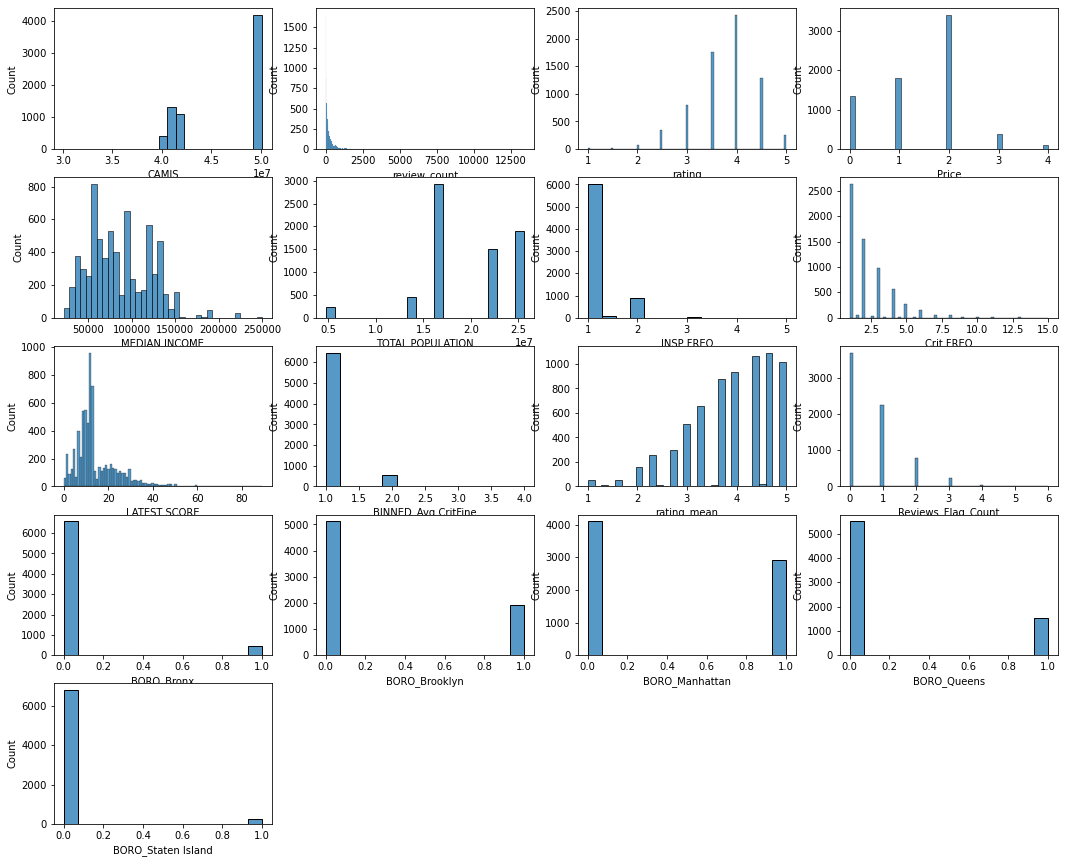

In [10]:
plt.figure(figsize=(18,15))

for i, column in enumerate(df.columns, 1):
    plt.subplot(5,4,i)
    sns.histplot(df[column])

In [11]:
corrMatrix = df.corr()
corrMatrix.style.background_gradient(cmap='coolwarm').set_precision(2)

In [12]:
#add a target classification column

conditions = [
    (encoded_data['LATEST SCORE'] <= 13),
    (encoded_data['LATEST SCORE'] > 13) & (encoded_data['LATEST SCORE'] <= 27),
    (encoded_data['LATEST SCORE'] > 27) & (encoded_data['LATEST SCORE'] <= 50),
    (encoded_data['LATEST SCORE']> 50)
    ]

# create a list of the values we want to assign for each condition
values = ['A', 'B', 'C', 'D']

# create a new column and use np.select to assign values to it using our lists as arguments
encoded_data['TARGET'] = np.select(conditions, values)

# display updated DataFrame
encoded_data.head()

CAMIS  review_count  rating  Price  MEDIAN INCOME  TOTAL POPULATION  \
0  40983698          1902     4.0      2        63717.0          16174853   
1  50096379            43     3.5      0        61859.0          22721487   
2  41264387             5     4.0      0        73107.0          22721487   
3  41650474             9     2.5      1       119375.0          25604184   
4  41650474             9     2.5      1       119375.0          25604184   

   INSP FREQ  Crit FREQ  LATEST SCORE  BINNED_Avg.CritFine  rating_mean  \
0        2.0        5.0             7                    1     4.000000   
1        1.0        1.0            11                    1     3.666667   
2        1.0        1.0            12                    1     2.666667   
3        1.5        1.5            10                    1     4.000000   
4        1.5        1.5            10                    1     4.000000   

   Reviews_Flag_Count  BORO_Bronx  BORO_Brooklyn  BORO_Manhattan  BORO_Queens  \
0                   2           0              0               1            0   
1                   2           0              0               0            1   
2                   1           0              0               0            1   
3                   0           0              1               0            0   
4                   0           0              1               0            0   

   BORO_Staten Island TARGET  
0                   0      A  
1                   0      A  
2                   0      A  
3                   0      A  
4                   0      A

In [13]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7031 entries, 0 to 7030
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CAMIS                7031 non-null   int64  
 1   review_count         7031 non-null   int64  
 2   rating               7031 non-null   float64
 3   Price                7031 non-null   int64  
 4   MEDIAN INCOME        6876 non-null   float64
 5   TOTAL POPULATION     7031 non-null   int64  
 6   INSP FREQ            7031 non-null   float64
 7   Crit FREQ            6500 non-null   float64
 8   LATEST SCORE         7031 non-null   int64  
 9   BINNED_Avg.CritFine  7031 non-null   int64  
 10  rating_mean          7031 non-null   float64
 11  Reviews_Flag_Count   7031 non-null   int64  
 12  BORO_Bronx           7031 non-null   uint8  
 13  BORO_Brooklyn        7031 non-null   uint8  
 14  BORO_Manhattan       7031 non-null   uint8  
 15  BORO_Queens          7031 non-null   u

In [14]:
#remove the columns in dataset where we won't be using
full_data= encoded_data.drop(columns=['LATEST SCORE'])

In [15]:
#replace null values and get the count of null values

count_nan_in_MASTER = full_data.isnull().sum()
print (count_nan_in_MASTER)

CAMIS                    0
review_count             0
rating                   0
Price                    0
MEDIAN INCOME          155
TOTAL POPULATION         0
INSP FREQ                0
Crit FREQ              531
BINNED_Avg.CritFine      0
rating_mean              0
Reviews_Flag_Count       0
BORO_Bronx               0
BORO_Brooklyn            0
BORO_Manhattan           0
BORO_Queens              0
BORO_Staten Island       0
TARGET                   0
dtype: int64


In [16]:
full_data.describe()

CAMIS  review_count       rating        Price  MEDIAN INCOME  \
count  7.031000e+03   7031.000000  7031.000000  7031.000000    6876.000000   
mean   4.647031e+07    258.208932     3.772863     1.438487   85696.892379   
std    4.388784e+06    530.418062     0.648531     0.904324   35752.882716   
min    3.007544e+07      1.000000     1.000000     0.000000   21447.000000   
25%    4.141027e+07     30.000000     3.500000     1.000000   56911.000000   
50%    5.003560e+07    101.000000     4.000000     2.000000   79883.000000   
75%    5.008424e+07    276.000000     4.000000     2.000000  118161.000000   
max    5.011743e+07  13395.000000     5.000000     4.000000  250001.000000   

       TOTAL POPULATION    INSP FREQ    Crit FREQ  BINNED_Avg.CritFine  \
count      7.031000e+03  7031.000000  6500.000000          7031.000000   
mean       1.964381e+07     1.145356     2.330000             1.082776   
std        5.087334e+06     0.372307     1.667953             0.292102   
min        4.710350e+06     1.000000     1.000000             1.000000   
25%        1.617485e+07     1.000000     1.000000             1.000000   
50%        1.617485e+07     1.000000     2.000000             1.000000   
75%        2.560418e+07     1.000000     3.000000             1.000000   
max        2.560418e+07     5.000000    15.000000             4.000000   

       rating_mean  Reviews_Flag_Count   BORO_Bronx  BORO_Brooklyn  \
count  7031.000000         7031.000000  7031.000000    7031.000000   
mean      3.909212            0.679562     0.063860       0.271654   
std       0.866695            0.873431     0.244521       0.444844   
min       1.000000            0.000000     0.000000       0.000000   
25%       3.333333            0.000000     0.000000       0.000000   
50%       4.000000            0.000000     0.000000       0.000000   
75%       4.666667            1.000000     0.000000       1.000000   
max       5.000000            6.000000     1.000000       1.000000   

       BORO_Manhattan  BORO_Queens  BORO_Staten Island  
count     7031.000000  7031.000000         7031.000000  
mean         0.416726     0.215332            0.032428  
std          0.493052     0.411082            0.177146  
min          0.000000     0.000000            0.000000  
25%          0.000000     0.000000            0.000000  
50%          0.000000     0.000000            0.000000  
75%          1.000000     0.000000            0.000000  
max          1.000000     1.000000            1.000000

In [17]:
#need to figure out how to replace specific values within a row
#this specific CAMIS: 40883586 is in Manhattan and will replace the Nan population with the mean population

#nan_values = full_data[full_data['TOTAL POPULATION'].isna()]
#nan_values

#full_data.loc[(full_data['BORO']==0) & (full_data['TOTAL POPULATION']=="")] = [['Manhattan', 1.986305e+07]]

#dropping the record for now

#full_data = full_data[full_data.CAMIS != 40883586]

In [18]:
#fill na columns with mean of column
full_data['Crit FREQ'].fillna(0, inplace=True)
full_data['MEDIAN INCOME'].fillna(value=full_data['MEDIAN INCOME'].mean(), inplace=True)

full_data.head()

CAMIS  review_count  rating  Price  MEDIAN INCOME  TOTAL POPULATION  \
0  40983698          1902     4.0      2        63717.0          16174853   
1  50096379            43     3.5      0        61859.0          22721487   
2  41264387             5     4.0      0        73107.0          22721487   
3  41650474             9     2.5      1       119375.0          25604184   
4  41650474             9     2.5      1       119375.0          25604184   

   INSP FREQ  Crit FREQ  BINNED_Avg.CritFine  rating_mean  Reviews_Flag_Count  \
0        2.0        5.0                    1     4.000000                   2   
1        1.0        1.0                    1     3.666667                   2   
2        1.0        1.0                    1     2.666667                   1   
3        1.5        1.5                    1     4.000000                   0   
4        1.5        1.5                    1     4.000000                   0   

   BORO_Bronx  BORO_Brooklyn  BORO_Manhattan  BORO_Queens  BORO_Staten Island  \
0           0              0               1            0                   0   
1           0              0               0            1                   0   
2           0              0               0            1                   0   
3           0              1               0            0                   0   
4           0              1               0            0                   0   

  TARGET  
0      A  
1      A  
2      A  
3      A  
4      A

In [19]:
#turn categorical data into numeric
#full_data['BORO'] = full_data['BORO'].astype('category')
#full_data['CUISINE DESCRIPTION'] = full_data['CUISINE DESCRIPTION'].astype('category')

#full_data['ZIPCODE'] = full_data['ZIPCODE'].astype('object')
full_data['MEDIAN INCOME'] = full_data['MEDIAN INCOME'].astype('float64')

full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7031 entries, 0 to 7030
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CAMIS                7031 non-null   int64  
 1   review_count         7031 non-null   int64  
 2   rating               7031 non-null   float64
 3   Price                7031 non-null   int64  
 4   MEDIAN INCOME        7031 non-null   float64
 5   TOTAL POPULATION     7031 non-null   int64  
 6   INSP FREQ            7031 non-null   float64
 7   Crit FREQ            7031 non-null   float64
 8   BINNED_Avg.CritFine  7031 non-null   int64  
 9   rating_mean          7031 non-null   float64
 10  Reviews_Flag_Count   7031 non-null   int64  
 11  BORO_Bronx           7031 non-null   uint8  
 12  BORO_Brooklyn        7031 non-null   uint8  
 13  BORO_Manhattan       7031 non-null   uint8  
 14  BORO_Queens          7031 non-null   uint8  
 15  BORO_Staten Island   7031 non-null   u

In [20]:
#full_data['BORO CAT'] = full_data['BORO'].cat.codes
#full_data['CUISINE CAT'] = full_data['CUISINE DESCRIPTION'].cat.codes

#full_data.head()

In [21]:
#removing boro and cuisine description due to data type
#removing the CAMIS and the BINNED column after running the model a few times, BINNED has little importance to model
#and CAMIS is creating complications to the model
#BINNED column is based on total critical fine

#full_data= full_data.drop(columns=['CAMIS','BORO', 'CUISINE DESCRIPTION', 'BINNED_Avg.CritFine'])

In [22]:
count_nan_in_full_data = full_data.isnull().sum()
print (count_nan_in_full_data)

CAMIS                  0
review_count           0
rating                 0
Price                  0
MEDIAN INCOME          0
TOTAL POPULATION       0
INSP FREQ              0
Crit FREQ              0
BINNED_Avg.CritFine    0
rating_mean            0
Reviews_Flag_Count     0
BORO_Bronx             0
BORO_Brooklyn          0
BORO_Manhattan         0
BORO_Queens            0
BORO_Staten Island     0
TARGET                 0
dtype: int64


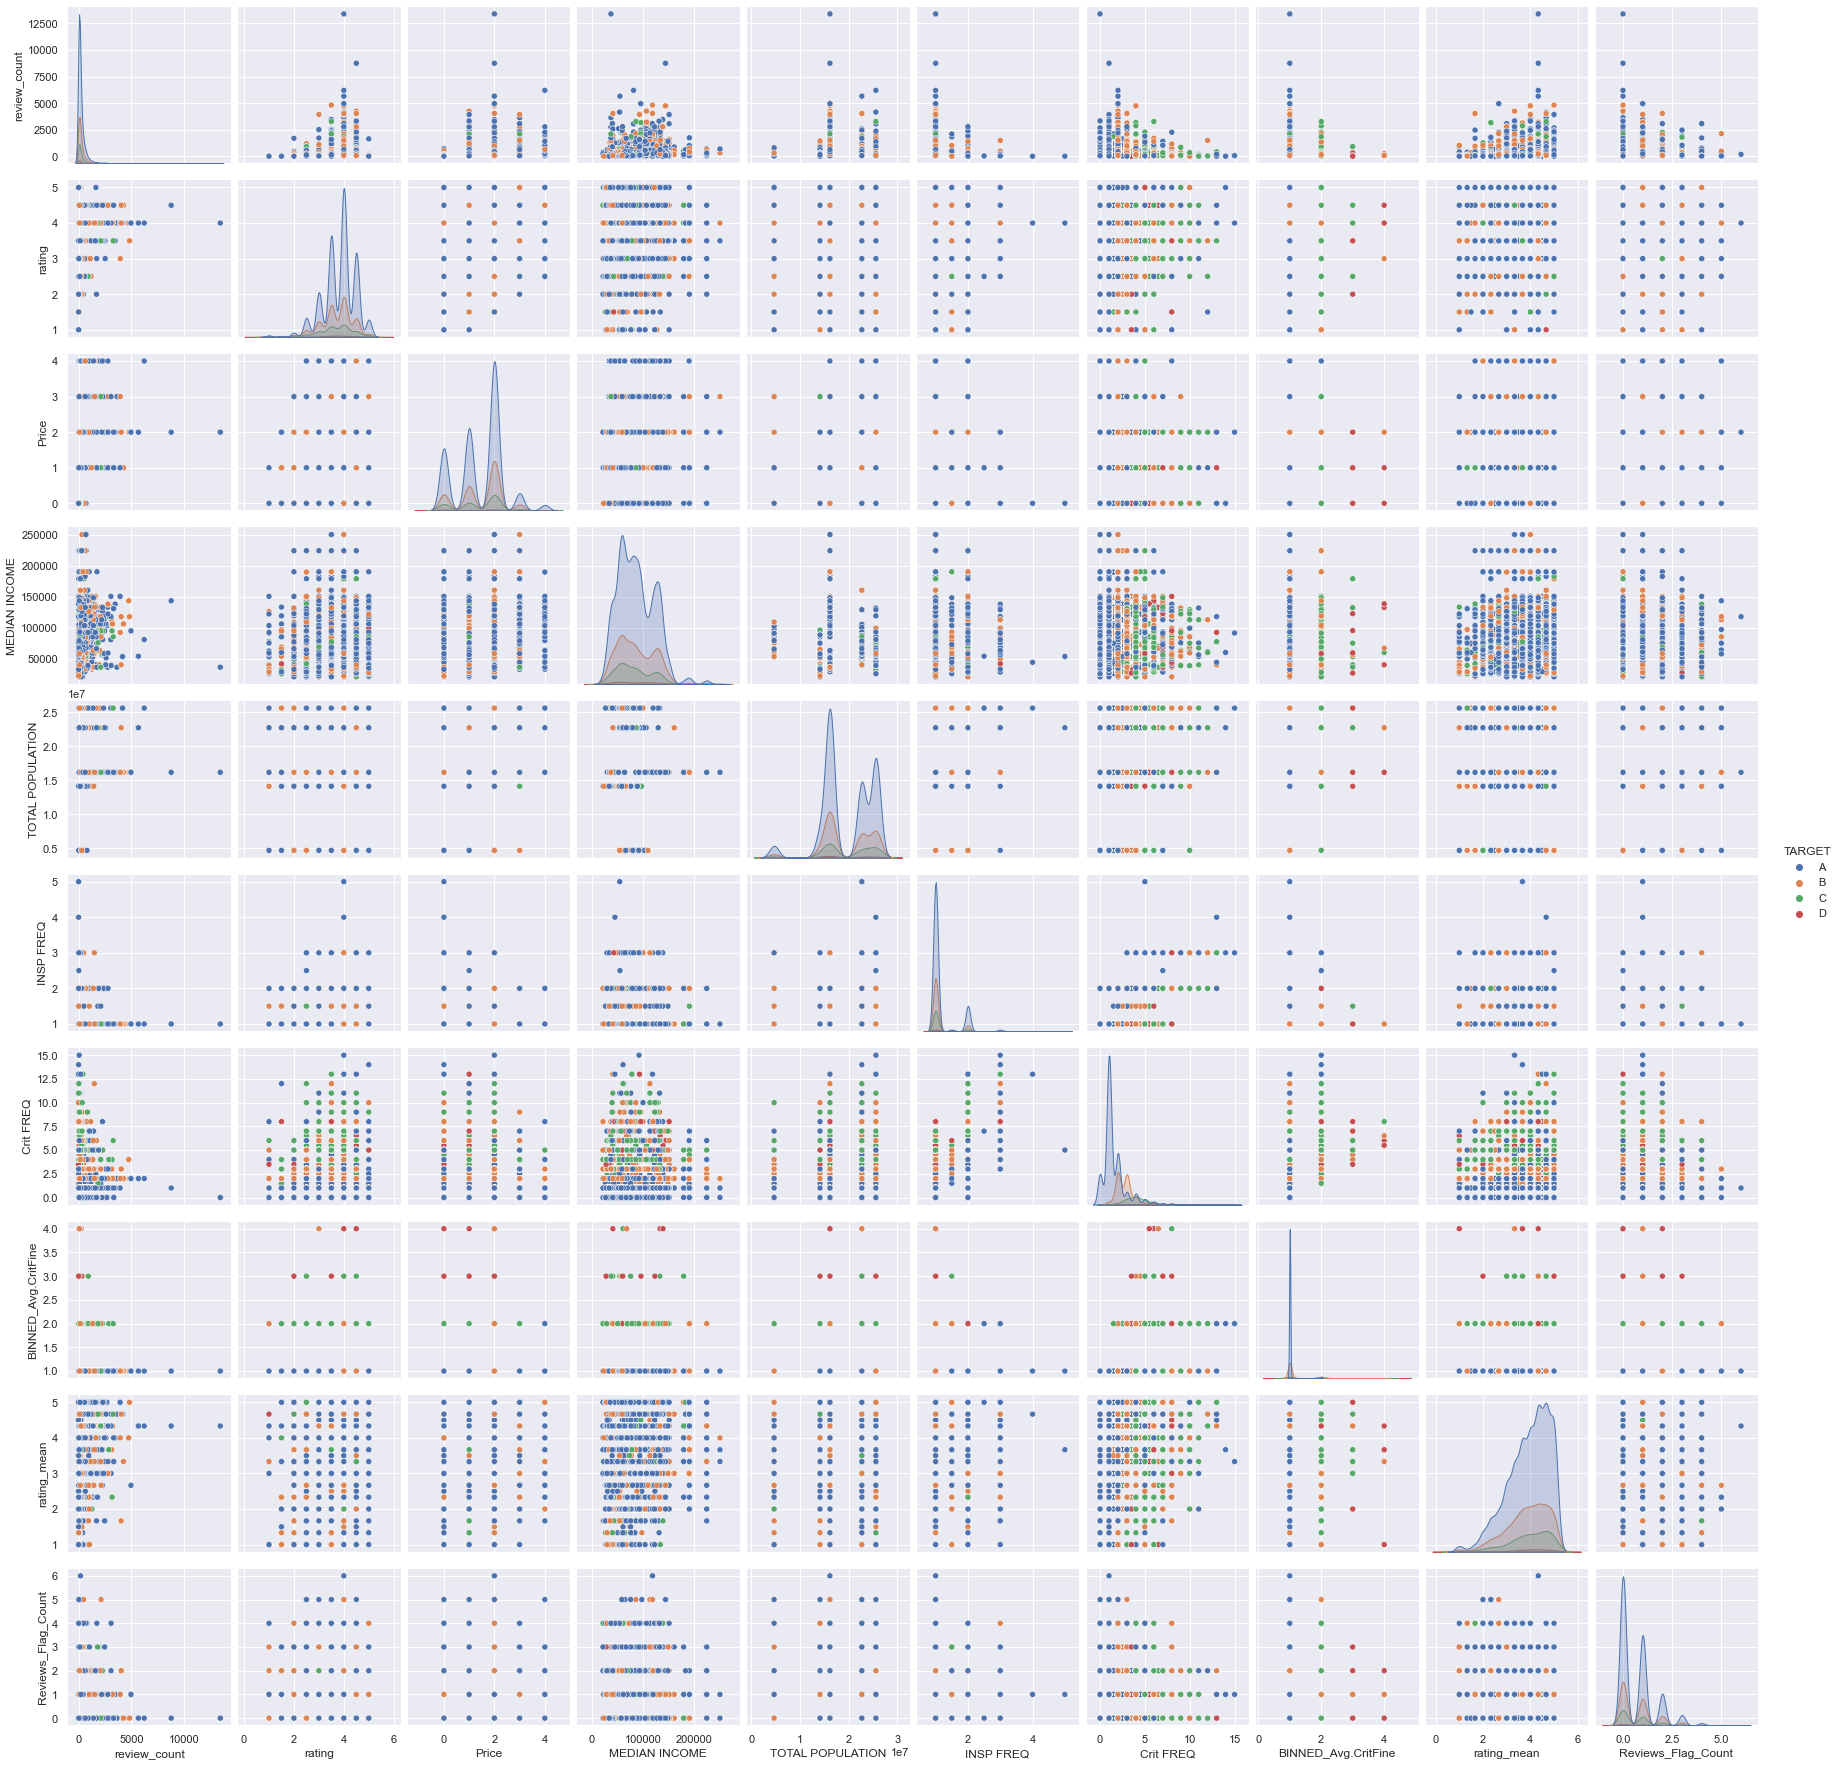

In [23]:
#plot data
sns.set()
sns.pairplot(full_data[['review_count','rating', 'Price', 'MEDIAN INCOME', 'TOTAL POPULATION', 
                   'INSP FREQ', 'Crit FREQ', 'BINNED_Avg.CritFine','rating_mean','Reviews_Flag_Count','TARGET']],
             hue="TARGET", diag_kind="kde")

In [24]:
predictors = full_data[['review_count','rating', 'Price', 'MEDIAN INCOME', 'TOTAL POPULATION', 
                   'INSP FREQ', 'Crit FREQ', 'BINNED_Avg.CritFine','rating_mean','Reviews_Flag_Count', 
                        'BORO_Bronx','BORO_Brooklyn', 'BORO_Manhattan','BORO_Queens','BORO_Staten Island']]

In [25]:
#define x and y variables
y = full_data['TARGET']
#n_classes = y.shape[0]

#full_data.drop(['TARGET'], axis=1, inplace = True)
#x=full_data

x = predictors

In [26]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normed = pd.DataFrame(x_scaled)

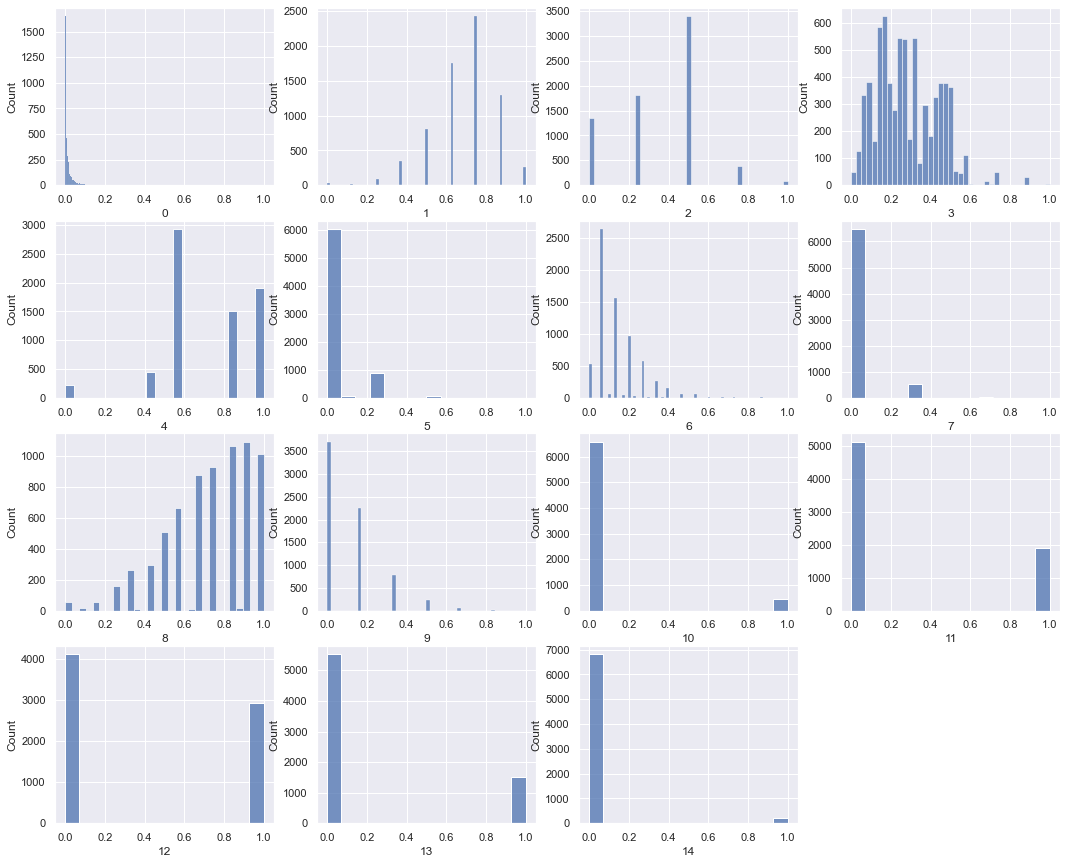

In [27]:
# more on displot: https://plotly.com/python/distplot/

plt.figure(figsize=(18,15))

for i, column in enumerate(df_normed.columns, 1):
    plt.subplot(4,4,i)
    sns.histplot(df_normed[column])

In [28]:
#import labelencoder - use when categorical is ordinal (true in our case) or there are too many categories in the parameter
from sklearn.preprocessing import LabelEncoder 
ly = LabelEncoder()
y= ly.fit_transform(y)

In [29]:
class_mapping = {l: i for i, l in enumerate(ly.classes_)}

class_mapping

{'A': 0, 'B': 1, 'C': 2, 'D': 3}

In [30]:
#split data into training and test set
from sklearn.model_selection import train_test_split

seed = 77
test_size=.33

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size, random_state=seed)

In [31]:
#x_train = pd.DataFrame(x_train, columns=x.columns)
#x_test = pd.DataFrame(x_test, columns=x.columns)


#ROC/AUC code: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

# Naive Bayes Classification

Accuracy: (True Positive + True Negative) / Total Population
Accuracy is a ratio of correctly predicted observation to the total observations. Accuracy is the most intuitive performance measure.
True Positive: The number of correct predictions that the occurrence is positive
True Negative: The number of correct predictions that the occurrence is negative


F1-Score: (2 x Precision x Recall) / (Precision + Recall)
F1-Score is the weighted average of Precision and Recall used in all types of classification algorithms. Therefore, this score takes both false positives and false negatives into account. F1-Score is usually more useful than accuracy, especially if you have an uneven class distribution.
Precision: When a positive value is predicted, how often is the prediction correct?
Recall: When the actual value is positive, how often is the prediction correct?

In [32]:
#use naive bayes classification, fit model, and check model accruacy
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB

gnb = OneVsRestClassifier(GaussianNB())
gnb.fit(x_train,y_train)
pred_gnb = gnb.predict(x_test)
pred_prob_gnb = gnb.predict_proba(x_test)

from sklearn.metrics import accuracy_score

acc_gnb = accuracy_score(y_test,pred_gnb)
print("Accuracy: %.2f%%" % (acc_gnb * 100.0))

Accuracy: 65.45%


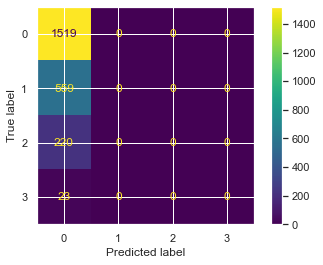

In [33]:
#print(confusion_matrix(y_test,pred_gnb, labels=gnb.classes_))

gnb_cm=confusion_matrix(y_test,pred_gnb, labels=gnb.classes_)
gnb_cmd=ConfusionMatrixDisplay(confusion_matrix=gnb_cm, display_labels=gnb.classes_)
gnb_cmd.plot()

In [34]:
print(classification_report(y_test,pred_gnb))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1519
           1       0.00      0.00      0.00       559
           2       0.00      0.00      0.00       220
           3       0.00      0.00      0.00        23

    accuracy                           0.65      2321
   macro avg       0.16      0.25      0.20      2321
weighted avg       0.43      0.65      0.52      2321



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


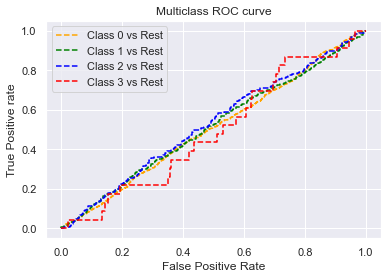

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_gnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

In [36]:
auc_gnb=roc_auc_score(y_test, gnb.predict_proba(x_test), multi_class='ovr')
print("AUC: %.2f%%" % (auc_gnb * 100.0))

AUC: 50.94%


In [37]:
gnb_y_predict= gnb.predict(x)

full_data['gnb_y_predict'] = gnb_y_predict

full_data.head()

CAMIS  review_count  rating  Price  MEDIAN INCOME  TOTAL POPULATION  \
0  40983698          1902     4.0      2        63717.0          16174853   
1  50096379            43     3.5      0        61859.0          22721487   
2  41264387             5     4.0      0        73107.0          22721487   
3  41650474             9     2.5      1       119375.0          25604184   
4  41650474             9     2.5      1       119375.0          25604184   

   INSP FREQ  Crit FREQ  BINNED_Avg.CritFine  rating_mean  Reviews_Flag_Count  \
0        2.0        5.0                    1     4.000000                   2   
1        1.0        1.0                    1     3.666667                   2   
2        1.0        1.0                    1     2.666667                   1   
3        1.5        1.5                    1     4.000000                   0   
4        1.5        1.5                    1     4.000000                   0   

   BORO_Bronx  BORO_Brooklyn  BORO_Manhattan  BORO_Queens  BORO_Staten Island  \
0           0              0               1            0                   0   
1           0              0               0            1                   0   
2           0              0               0            1                   0   
3           0              1               0            0                   0   
4           0              1               0            0                   0   

  TARGET  gnb_y_predict  
0      A              0  
1      A              0  
2      A              0  
3      A              0  
4      A              0

# Logistic Regression

In [38]:
# use logistics regression, fit model, and check model accuracy
from sklearn.linear_model import LogisticRegression

logreg = OneVsRestClassifier(LogisticRegression(solver = 'lbfgs',multi_class='auto'))
logreg.fit(x_train, y_train)
pred_logreg = logreg.predict(x_test)
pred_prob_logreg = logreg.predict_proba(x_test)


acc_logreg = accuracy_score(y_test,pred_logreg)
print("Accuracy: %.2f%%" % (acc_logreg * 100.0))

Accuracy: 65.45%


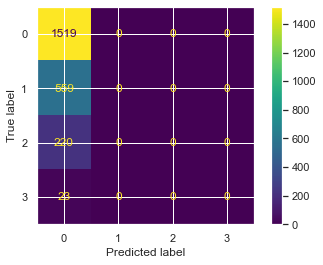

In [39]:
#print(confusion_matrix(y_test,pred_logreg))

logreg_cm=confusion_matrix(y_test,pred_logreg, labels=logreg.classes_)
logreg_cmd=ConfusionMatrixDisplay(confusion_matrix=logreg_cm, display_labels=logreg.classes_)
logreg_cmd.plot()

In [40]:
print(classification_report(y_test,pred_logreg))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79      1519
           1       0.00      0.00      0.00       559
           2       0.00      0.00      0.00       220
           3       0.00      0.00      0.00        23

    accuracy                           0.65      2321
   macro avg       0.16      0.25      0.20      2321
weighted avg       0.43      0.65      0.52      2321



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


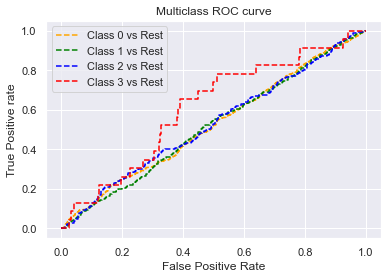

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_logreg[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

In [42]:
auc_logreg=roc_auc_score(y_test, logreg.predict_proba(x_test), multi_class='ovr')
print("AUC: %.2f%%" % (auc_logreg * 100.0))

AUC: 54.34%


In [43]:
logreg_y_predict= logreg.predict(x)

full_data['logreg_y_predict'] = logreg_y_predict

full_data.head()

CAMIS  review_count  rating  Price  MEDIAN INCOME  TOTAL POPULATION  \
0  40983698          1902     4.0      2        63717.0          16174853   
1  50096379            43     3.5      0        61859.0          22721487   
2  41264387             5     4.0      0        73107.0          22721487   
3  41650474             9     2.5      1       119375.0          25604184   
4  41650474             9     2.5      1       119375.0          25604184   

   INSP FREQ  Crit FREQ  BINNED_Avg.CritFine  rating_mean  Reviews_Flag_Count  \
0        2.0        5.0                    1     4.000000                   2   
1        1.0        1.0                    1     3.666667                   2   
2        1.0        1.0                    1     2.666667                   1   
3        1.5        1.5                    1     4.000000                   0   
4        1.5        1.5                    1     4.000000                   0   

   BORO_Bronx  BORO_Brooklyn  BORO_Manhattan  BORO_Queens  BORO_Staten Island  \
0           0              0               1            0                   0   
1           0              0               0            1                   0   
2           0              0               0            1                   0   
3           0              1               0            0                   0   
4           0              1               0            0                   0   

  TARGET  gnb_y_predict  logreg_y_predict  
0      A              0                 0  
1      A              0                 0  
2      A              0                 0  
3      A              0                 0  
4      A              0                 0

# Decision Tree Classifier

In [44]:
# use decision tree, fit model, and check model accuracy
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
pred_prob_dt = dt.predict_proba(x_test)

acc_dt = accuracy_score(y_test,pred_dt)
print("Accuracy: %.2f%%" % (acc_dt * 100.0))


Accuracy: 76.00%


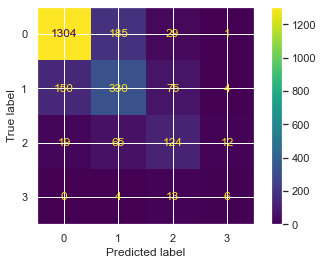

In [45]:
#print(confusion_matrix(y_test,pred_dt))

dt_cm=confusion_matrix(y_test,pred_dt, labels=dt.classes_)
dt_cmd=ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=dt.classes_)
dt_cmd.plot()

In [46]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1519
           1       0.57      0.59      0.58       559
           2       0.51      0.56      0.54       220
           3       0.26      0.26      0.26        23

    accuracy                           0.76      2321
   macro avg       0.56      0.57      0.56      2321
weighted avg       0.77      0.76      0.76      2321



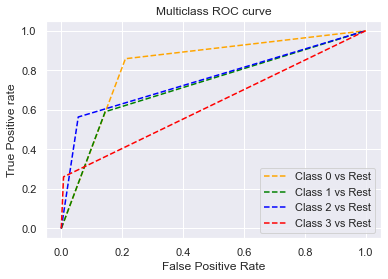

In [47]:
# roc curve for classes

fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_dt[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  


In [48]:
#capture variable importance
dt_importances = dt.feature_importances_

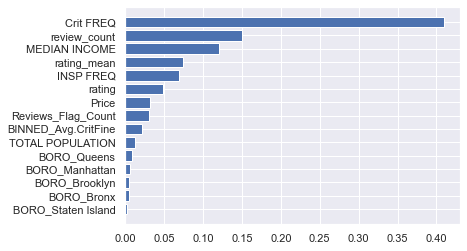

In [49]:
#plot variable importance
indices = np.argsort(dt_importances)

fig, ax = plt.subplots()
ax.barh(range(len(dt_importances)), dt_importances[indices])
ax.set_yticks(range(len(dt_importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

In [50]:
auc_dt=roc_auc_score(y_test, dt.predict_proba(x_test), multi_class='ovr')
print("AUC: %.2f%%" % (auc_dt * 100.0))

AUC: 73.19%


In [51]:
dt_y_predict= dt.predict(x)

full_data['dt_y_predict'] = dt_y_predict

full_data.head()

CAMIS  review_count  rating  Price  MEDIAN INCOME  TOTAL POPULATION  \
0  40983698          1902     4.0      2        63717.0          16174853   
1  50096379            43     3.5      0        61859.0          22721487   
2  41264387             5     4.0      0        73107.0          22721487   
3  41650474             9     2.5      1       119375.0          25604184   
4  41650474             9     2.5      1       119375.0          25604184   

   INSP FREQ  Crit FREQ  BINNED_Avg.CritFine  rating_mean  Reviews_Flag_Count  \
0        2.0        5.0                    1     4.000000                   2   
1        1.0        1.0                    1     3.666667                   2   
2        1.0        1.0                    1     2.666667                   1   
3        1.5        1.5                    1     4.000000                   0   
4        1.5        1.5                    1     4.000000                   0   

   BORO_Bronx  BORO_Brooklyn  BORO_Manhattan  BORO_Queens  BORO_Staten Island  \
0           0              0               1            0                   0   
1           0              0               0            1                   0   
2           0              0               0            1                   0   
3           0              1               0            0                   0   
4           0              1               0            0                   0   

  TARGET  gnb_y_predict  logreg_y_predict  dt_y_predict  
0      A              0                 0             0  
1      A              0                 0             0  
2      A              0                 0             0  
3      A              0                 0             0  
4      A              0                 0             0

# K Nearest Neighbors

In [52]:
# referenced this article: https://stackoverflow.com/questions/39685740/calculate-sklearn-roc-auc-score-for-multi-class
# auc/roc from this article: https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/
# other ROC articles: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
# https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

import pandas as pd
import numpy as np
from scipy import interp

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

def class_report(y_true, y_pred, y_score=None, average='micro'):
    if y_true.shape != y_pred.shape:
        print("Error! y_true %s is not the same shape as y_pred %s" % (
              y_true.shape,
              y_pred.shape)
        )
        return

    lb = LabelBinarizer()

    if len(y_true.shape) == 1:
        lb.fit(y_true)

    #Value counts of predictions
    labels, cnt = np.unique(
        y_pred,
        return_counts=True)
    n_classes = len(labels)
    pred_cnt = pd.Series(cnt, index=labels)

    metrics_summary = precision_recall_fscore_support(
            y_true=y_true,
            y_pred=y_pred,
            labels=labels)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index,
        columns=labels)

    support = class_report_df.loc['support']
    total = support.sum() 
    class_report_df['avg / total'] = avg[:-1] + [total]

    class_report_df = class_report_df.T
    class_report_df['pred'] = pred_cnt
    class_report_df['pred'].iloc[-1] = total

    if not (y_score is None):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for label_it, label in enumerate(labels):
            fpr[label], tpr[label], _ = roc_curve(
                (y_true == label).astype(int), 
                y_score[:, label_it])

            roc_auc[label] = auc(fpr[label], tpr[label])

        if average == 'micro':
            if n_classes <= 2:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                    lb.transform(y_true).ravel(), 
                    y_score[:, 1].ravel())
            else:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                        lb.transform(y_true).ravel(), 
                        y_score.ravel())

            roc_auc["avg / total"] = auc(
                fpr["avg / total"], 
                tpr["avg / total"])

        elif average == 'macro':
            # First aggregate all false positive rates
            all_fpr = np.unique(np.concatenate([
                fpr[i] for i in labels]
            ))

            # Then interpolate all ROC curves at this points
            mean_tpr = np.zeros_like(all_fpr)
            for i in labels:
                mean_tpr += interp(all_fpr, fpr[i], tpr[i])

            # Finally average it and compute AUC
            mean_tpr /= n_classes

            fpr["macro"] = all_fpr
            tpr["macro"] = mean_tpr

            roc_auc["avg / total"] = auc(fpr["macro"], tpr["macro"])

        class_report_df['AUC'] = pd.Series(roc_auc)

    return class_report_df

In [53]:
# use KNN, fit model, and check model accuracy
from sklearn.neighbors import KNeighborsClassifier

knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=4,algorithm='ball_tree'))
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_prob_knn = knn.predict_proba(x_test)

acc_knn = accuracy_score(y_test,pred_knn)
print("Accuracy: %.2f%%" % (acc_knn * 100.0))

Accuracy: 55.19%


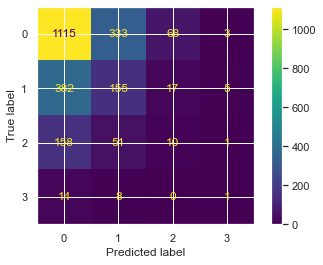

In [54]:
#print(confusion_matrix(y_test,pred_knn))

knn_cm=confusion_matrix(y_test,pred_knn, labels=knn.classes_)
knn_cmd=ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=knn.classes_)
knn_cmd.plot()

In [55]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1519
           1       0.28      0.28      0.28       559
           2       0.11      0.05      0.06       220
           3       0.10      0.04      0.06        23

    accuracy                           0.55      2321
   macro avg       0.29      0.28      0.28      2321
weighted avg       0.52      0.55      0.53      2321



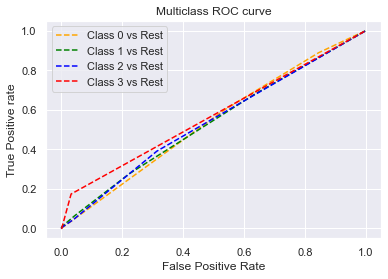

In [56]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_knn[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

In [57]:
report_with_auc = class_report(
    y_true=y_test, 
    y_pred=knn.predict(x_test), 
    y_score=knn.predict_proba(x_test))

print(report_with_auc)

             precision    recall  f1-score  support    pred       AUC
0             0.668065  0.734036  0.699498   1519.0  1669.0  0.537045
1             0.283364  0.277281  0.280289    559.0   547.0  0.534945
2             0.105263  0.045455  0.063492    220.0    95.0  0.537678
3             0.100000  0.043478  0.060606     23.0    10.0  0.570742
avg / total   0.516436  0.551917  0.531918   2321.0  2321.0  0.799206


In [58]:
auc_knn=roc_auc_score(y_test, knn.predict_proba(x_test), multi_class='ovr')
print("AUC: %.2f%%" % (auc_knn * 100.0))

AUC: 54.51%


In [59]:
knn_y_predict= knn.predict(x)

full_data['knn_y_predict'] = knn_y_predict

full_data.head()

CAMIS  review_count  rating  Price  MEDIAN INCOME  TOTAL POPULATION  \
0  40983698          1902     4.0      2        63717.0          16174853   
1  50096379            43     3.5      0        61859.0          22721487   
2  41264387             5     4.0      0        73107.0          22721487   
3  41650474             9     2.5      1       119375.0          25604184   
4  41650474             9     2.5      1       119375.0          25604184   

   INSP FREQ  Crit FREQ  BINNED_Avg.CritFine  rating_mean  ...  BORO_Bronx  \
0        2.0        5.0                    1     4.000000  ...           0   
1        1.0        1.0                    1     3.666667  ...           0   
2        1.0        1.0                    1     2.666667  ...           0   
3        1.5        1.5                    1     4.000000  ...           0   
4        1.5        1.5                    1     4.000000  ...           0   

   BORO_Brooklyn  BORO_Manhattan  BORO_Queens  BORO_Staten Island  TARGET  \
0              0               1            0                   0       A   
1              0               0            1                   0       A   
2              0               0            1                   0       A   
3              1               0            0                   0       A   
4              1               0            0                   0       A   

  gnb_y_predict  logreg_y_predict  dt_y_predict  knn_y_predict  
0             0                 0             0              0  
1             0                 0             0              0  
2             0                 0             0              0  
3             0                 0             0              0  
4             0                 0             0              0  

[5 rows x 21 columns]

# Support Vector Machine

In [60]:
# use SVM, fit model, and check model accuracy
from sklearn.svm import SVC

svm = OneVsRestClassifier(SVC(C=50,kernel='rbf',gamma=1,probability=True))
svm.fit(x_train, y_train)
pred_svm = svm.predict(x_test)
pred_prob_svm = svm.predict_proba(x_test)

acc_svm=accuracy_score(y_test,pred_svm)

print("Accuracy: %.2f%%" % (acc_svm * 100.0))

Accuracy: 67.30%


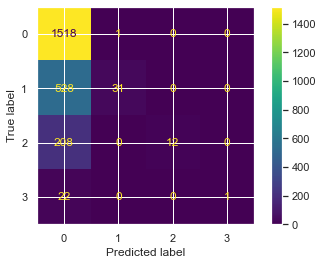

In [61]:
#print(confusion_matrix(y_test,pred_svm))

svm_cm=confusion_matrix(y_test,pred_svm, labels=svm.classes_)
svm_cmd=ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=svm.classes_)
svm_cmd.plot()

In [62]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1519
           1       0.97      0.06      0.10       559
           2       1.00      0.05      0.10       220
           3       1.00      0.04      0.08        23

    accuracy                           0.67      2321
   macro avg       0.91      0.29      0.27      2321
weighted avg       0.77      0.67      0.56      2321



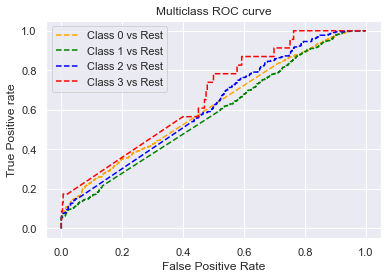

In [63]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_svm[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

In [64]:
auc_svm = roc_auc_score(y_test, svm.predict_proba(x_test), multi_class='ovr')
print("AUC: %.2f%%" % (auc_svm * 100.0))

AUC: 61.66%


In [65]:
svm_y_predict= svm.predict(x)

full_data['svm_y_predict'] = svm_y_predict

full_data.head()

CAMIS  review_count  rating  Price  MEDIAN INCOME  TOTAL POPULATION  \
0  40983698          1902     4.0      2        63717.0          16174853   
1  50096379            43     3.5      0        61859.0          22721487   
2  41264387             5     4.0      0        73107.0          22721487   
3  41650474             9     2.5      1       119375.0          25604184   
4  41650474             9     2.5      1       119375.0          25604184   

   INSP FREQ  Crit FREQ  BINNED_Avg.CritFine  rating_mean  ...  BORO_Brooklyn  \
0        2.0        5.0                    1     4.000000  ...              0   
1        1.0        1.0                    1     3.666667  ...              0   
2        1.0        1.0                    1     2.666667  ...              0   
3        1.5        1.5                    1     4.000000  ...              1   
4        1.5        1.5                    1     4.000000  ...              1   

   BORO_Manhattan  BORO_Queens  BORO_Staten Island  TARGET  gnb_y_predict  \
0               1            0                   0       A              0   
1               0            1                   0       A              0   
2               0            1                   0       A              0   
3               0            0                   0       A              0   
4               0            0                   0       A              0   

  logreg_y_predict  dt_y_predict  knn_y_predict  svm_y_predict  
0                0             0              0              0  
1                0             0              0              0  
2                0             0              0              0  
3                0             0              0              0  
4                0             0              0              0  

[5 rows x 22 columns]

# XGBoosting

In [66]:
# use XGBoosting, fit model, and check model accuracy

from xgboost import XGBClassifier

xgbt = XGBClassifier()

xgbt.fit(x_train, y_train)
pred_xgbt = xgbt.predict(x_test)
pred_prob_xgbt = xgbt.predict_proba(x_test)

acc_xgbt= accuracy_score(y_test, pred_xgbt)


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[07:42:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [67]:
print("Accuracy: %.2f%%" % (acc_xgbt * 100.0))

Accuracy: 79.45%


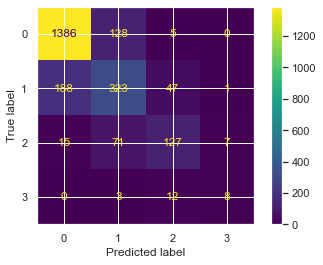

In [68]:
#print(confusion_matrix(y_test,pred_xgbt))

xgbt_cm=confusion_matrix(y_test,pred_xgbt, labels=xgbt.classes_)
xgbt_cmd=ConfusionMatrixDisplay(confusion_matrix=xgbt_cm, display_labels=xgbt.classes_)
xgbt_cmd.plot()

In [69]:
print(classification_report(y_test,pred_xgbt))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1519
           1       0.62      0.58      0.60       559
           2       0.66      0.58      0.62       220
           3       0.50      0.35      0.41        23

    accuracy                           0.79      2321
   macro avg       0.66      0.60      0.63      2321
weighted avg       0.79      0.79      0.79      2321



In [70]:
#capture variable importance
xgbt_importances = xgbt.feature_importances_

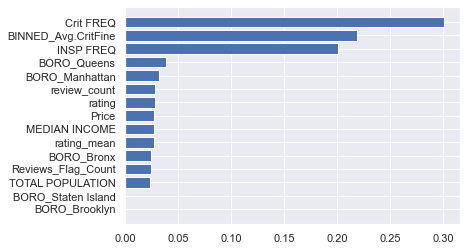

In [71]:
#plot variable importance
xgbt_indices = np.argsort(xgbt_importances)

fig, ax = plt.subplots()
ax.barh(range(len(xgbt_importances)), xgbt_importances[xgbt_indices])
ax.set_yticks(range(len(xgbt_importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[xgbt_indices])

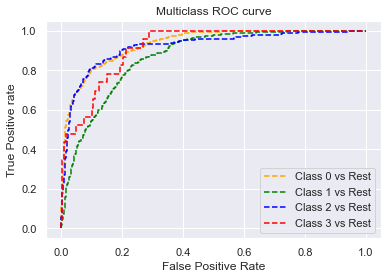

In [72]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob_xgbt[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

In [73]:
auc_xgbt=roc_auc_score(y_test, xgbt.predict_proba(x_test), multi_class='ovr')
print("AUC: %.2f%%" % (auc_xgbt * 100.0))

AUC: 90.98%


In [74]:
xgbt_y_predict= xgbt.predict(x)

full_data['xgbt_y_predict'] = xgbt_y_predict

full_data.head()

CAMIS  review_count  rating  Price  MEDIAN INCOME  TOTAL POPULATION  \
0  40983698          1902     4.0      2        63717.0          16174853   
1  50096379            43     3.5      0        61859.0          22721487   
2  41264387             5     4.0      0        73107.0          22721487   
3  41650474             9     2.5      1       119375.0          25604184   
4  41650474             9     2.5      1       119375.0          25604184   

   INSP FREQ  Crit FREQ  BINNED_Avg.CritFine  rating_mean  ...  \
0        2.0        5.0                    1     4.000000  ...   
1        1.0        1.0                    1     3.666667  ...   
2        1.0        1.0                    1     2.666667  ...   
3        1.5        1.5                    1     4.000000  ...   
4        1.5        1.5                    1     4.000000  ...   

   BORO_Manhattan  BORO_Queens  BORO_Staten Island  TARGET  gnb_y_predict  \
0               1            0                   0       A              0   
1               0            1                   0       A              0   
2               0            1                   0       A              0   
3               0            0                   0       A              0   
4               0            0                   0       A              0   

   logreg_y_predict dt_y_predict  knn_y_predict  svm_y_predict  xgbt_y_predict  
0                 0            0              0              0               0  
1                 0            0              0              0               0  
2                 0            0              0              0               0  
3                 0            0              0              0               0  
4                 0            0              0              0               0  

[5 rows x 23 columns]

In [75]:
full_data.to_csv('NYC Data with predicted values.csv', index=False)

# WARNING!!! RUNNING THE FOLLOWING CODE WILL TAKE A VERY LONG TIME!! Suggest running a sub-sample instead 

reference doc: https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a

In [76]:
xgbt_explainer = shap.KernelExplainer(xgbt.predict, x_test)
xgbt_shap_values = xgbt_explainer.shap_values(x_test)

#xgbt_shap_local = shap.explain_local(x_test[:5], y_test[:5])

Using 2321 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


AttributeError: module 'shap' has no attribute 'explain_local'

In [77]:
shap.initjs()

In [78]:
# plot the SHAP values for the 10th observation 
shap.force_plot(xgbt_explainer.expected_value, xgbt_shap_values[1680,:], x_test.iloc[1680,:])

In [79]:
y_test.mean()

0.46014648858250756

In [80]:
x_test.mean()

review_count           2.606364e+02
rating                 3.769927e+00
Price                  1.438173e+00
MEDIAN INCOME          8.571821e+04
TOTAL POPULATION       1.955834e+07
INSP FREQ              1.143042e+00
Crit FREQ              2.171478e+00
BINNED_Avg.CritFine    1.090047e+00
rating_mean            3.896668e+00
Reviews_Flag_Count     6.747092e-01
BORO_Bronx             6.419647e-02
BORO_Brooklyn          2.623869e-01
BORO_Manhattan         4.196467e-01
BORO_Queens            2.193020e-01
BORO_Staten Island     3.446790e-02
dtype: float64

- The output value is the prediction for that observation (the prediction for this observation is 0 or A).

- The base value is the expected value if we don't have any predictors and only have the dependent variable. In other words, the base value is the mean of th expected value of y. Th expected value of y is 0.4.

- The red and blue bars represent the the impact of each variable that push the prediction higher are shown in red, and those pushing the prediction lower are in blue.

- Critical Violation Frequncy has a negative relationship with the inspection score. In our case, we picked the 1700 observation in our data. The value of Crit FREQ of 1 is less than the average value of 2.17; therefore, it pushes the inspection score to a towards the left or a lower inspection score. As a reminder, the higher the inspection score, the higher the risk. Althoguh this is a negative relationship, it is a positive effect on inspection score.

- Inspection Freq has a positive relationship with the inspection score. The value 1 is lower than the average and pushing the expected value towards the right. 

- The plot is centered on the x-axis at explainer.expected_value. All SHAP values are relative to the model's expected value like a linear model's effects are relative to the intercept.

In [81]:
shap.force_plot(xgbt_explainer.expected_value, xgbt_shap_values, x_test)

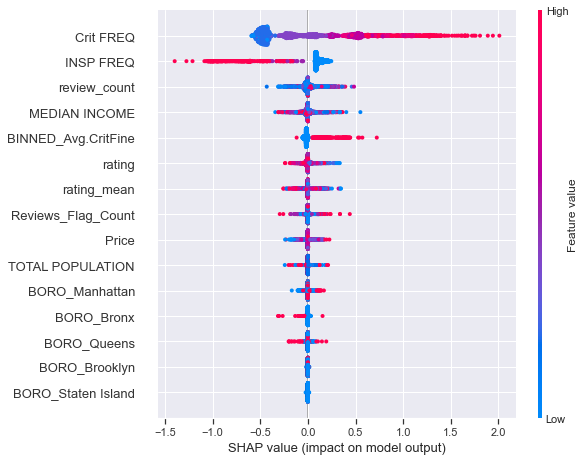

In [82]:
shap.summary_plot(xgbt_shap_values, x_test)

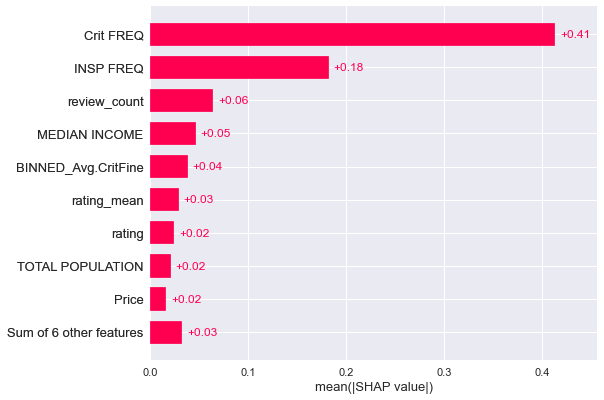

In [96]:
shap.plots.bar(shap_values)

# Plot ROC for multiple algorithms

In [94]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_gnb[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_logreg[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_dt[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob_knn[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob_svm[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob_xgbt[:,1], pos_label=1)
#fpr7, tpr7, thresh7 = roc_curve(y_test, pred_xgbweighted[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

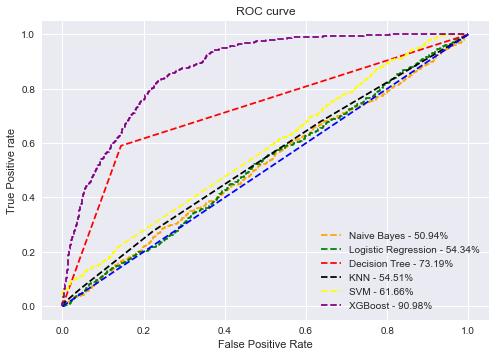

In [95]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Naive Bayes - ' + str("%.2f%%" % (100*auc_gnb)) )
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic Regression - ' + str("%.2f%%" % (100*auc_logreg)))
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Decision Tree - '+ str("%.2f%%" % (100*auc_dt)))
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='KNN - '+ str("%.2f%%" % (100*auc_knn)))
plt.plot(fpr5, tpr5, linestyle='--',color='yellow', label='SVM - ' + str("%.2f%%" % (100*auc_svm)))
plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='XGBoost - ' + str("%.2f%%" % (100*auc_xgbt)))
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();